In [4]:
# set up
import pandas as pd
import numpy as np
import pickle
import time 
import os
import matplotlib.pyplot as plt
import datetime
from operator import itemgetter
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pylab import *
from matplotlib.font_manager import FontProperties  
data_folder_path = 'C:\\Users\\goodluck\\Desktop\\DB'
raw_data_path =  "C:\\Users\\goodluck\\Desktop\\DB\\raw_data"
storage_path =  "C:\\Users\\goodluck\\Desktop\\DB\\database_storage"
DTBS_path = os.path.join(storage_path, "DTBS.pkl")
font = FontProperties(fname=r"simsun.ttf", size=14)  
matplotlib.rcParams['axes.unicode_minus'] =False
mpl.rcParams['font.sans-serif'] = ['SimHei']
tick_spacing = 4

# re-open
with open(DTBS_path, 'rb') as f:  
    DTBS = pickle.load(f)
    
# helper -- days
def select_days(s_d, e_d, wkd, gap):
    days = []
    flag = 0
    sdt = datetime.datetime.strptime(s_d, '%Y-%m-%d').date()
    edt = datetime.datetime.strptime(e_d, '%Y-%m-%d').date()
    for day in DTBS['D']['day']:
        cdt =  datetime.datetime.strptime(day, '%Y-%m-%d').date()
        if cdt >= sdt:
            flag = 1
        
        if cdt == edt:
            days.append(day)
            break
        
        if cdt > edt:
            break 
            
        if flag == 1:
            days.append(day)
            
    s_days = []
    count = 0
    for day in days:
        if day in DTBS['D'][wkd]:
            if count % gap == 0:
                s_days.append(day)
                
            count += 1
    
    
    return s_days

f20wm = select_days('2020-01-01', '2020-06-30', 'mon', 1)
f20fm = select_days('2020-01-01', '2020-06-30', 'mon', 2)
f20mm = select_days('2020-01-01', '2020-06-30', 'mon', 4)
s20wm = select_days('2020-07-01', '2020-12-31', 'mon', 1)
s20fm = select_days('2020-07-01', '2020-12-31', 'mon', 2)
s20mm = select_days('2020-07-01', '2020-12-31', 'mon', 4)
f21wm = select_days('2021-01-01', '2021-06-30', 'mon', 1)
f21fm = select_days('2021-01-01', '2021-06-30', 'mon', 2)
f21mm = select_days('2021-01-01', '2021-06-30', 'mon', 4)
s21wm = select_days('2021-07-01', '2021-12-31', 'mon', 1)
s21fm = select_days('2021-07-01', '2021-12-31', 'mon', 2)
s21mm = select_days('2021-07-01', '2021-12-31', 'mon', 4)
f22wm = select_days('2022-01-01', '2022-06-30', 'mon', 1)
f22fm = select_days('2022-01-01', '2022-06-30', 'mon', 2)
f22mm = select_days('2022-01-01', '2022-06-30', 'mon', 4)
s22wm = select_days('2022-07-01', '2022-12-31', 'mon', 1)
s22ww = select_days('2022-07-01', '2022-12-31', 'wed', 1)
s22fm = select_days('2022-07-01', '2022-12-31', 'mon', 2)
s22mm = select_days('2022-07-01', '2022-12-31', 'mon', 4)
f23wm = select_days('2023-01-01', '2023-05-31', 'mon', 1)
f23fm = select_days('2023-01-01', '2023-05-31', 'mon', 2)
f23mm = select_days('2023-01-01', '2023-05-31', 'mon', 4)
f23ww = select_days('2023-01-01', '2023-05-31', 'wed', 1)
f23mm.append('2023-04-10')
a20wm = select_days('2020-01-01', '2020-12-31', 'mon', 1)
a20fm = select_days('2020-01-01', '2020-12-31', 'mon', 2)
a20mm = select_days('2020-01-01', '2020-12-31', 'mon', 4)
a21wm = select_days('2021-01-01', '2021-12-31', 'mon', 1)
a21fm = select_days('2021-01-01', '2021-12-31', 'mon', 2)
a21mm = select_days('2021-01-01', '2021-12-31', 'mon', 4)
a22wm = select_days('2022-01-01', '2022-12-31', 'mon', 1)
a22fm = select_days('2022-01-01', '2022-12-31', 'mon', 2)
a22mm = select_days('2022-01-01', '2022-12-31', 'mon', 4)

a22wm = select_days('2022-01-01', '2022-12-31', 'mon', 1)
a22wt = select_days('2022-01-01', '2022-12-31', 'tue', 1)
a22ww = select_days('2022-01-01', '2022-12-31', 'wed', 1)
a22wh = select_days('2022-01-01', '2022-12-31', 'thu', 1)
a22wf = select_days('2022-01-01', '2022-12-31', 'fri', 1)



hywm = [f20wm, s20wm, f21wm, s21wm, f22wm, s22ww, f23ww]
hyfm = [f20fm, s20fm, f21fm, s21fm, f22fm, s22fm, f23fm]
hymm = [f20mm, s20mm, f21mm, s21mm, f22mm, s22mm, f23mm]
test = ['2023-04-12','2023-04-19']
# helper -- others

def sharpe(profit):
    avg_rate = np.mean(profit)
    std_rate = np.std(profit)
    Sharpe_Ratio = (avg_rate * 52 -0.028397) / (std_rate * sqrt(52))
    return(Sharpe_Ratio)


def down(profit):
    return_list = [i+1 for i in profit]
    i = np.argmax((np.maximum.accumulate(return_list) - return_list))
    if i == 0:
        return 0
    j = np.argmax(return_list[:i])  # 开始位置
    drawdown_rate = (return_list[j] - return_list[i]) / return_list[j]
    return drawdown_rate


def vola(profit):
    log_return_list = [log(i+1) for i in profit]
    Volatility = std(log_return_list) / sqrt(5)
    annualVolatility = Volatility * sqrt(252) 
    return annualVolatility


def select_group(nm, dt, codes, grp):
    select = []
    if nm == 'id':
        for code in codes:
            if DTBS['B'][code]['yqq'] == grp:
                select.append(code)
    elif nm == 'pr':
        for code in codes:
            if DTBS['A'][code][dt]['dp'] >= grp[0] and DTBS['A'][code][dt]['dp'] <= grp[1]:
                select.append(code)
                
    else:
        for code in codes:
            if DTBS['B'][code]['cat1']  == grp[0]:
                if DTBS['A'][code][dt]['dp'] >= grp[1][0] and DTBS['A'][code][dt]['dp'] <= grp[1][1]:
                    select.append(code)
    return select


def transform_group(grps):
    if len(grps) == 1:
        return grps[0]
    else:
        grp = ['idpr', []]
        for cd1 in grps[0][1]:
            for cd2 in grps[1][1]:
                grp[1].append((cd1, cd2))
        
        return grp
    
def ipo(codes, dt):
    exist = []
    for code in codes:
        if datetime.datetime.strptime(DTBS['B'][code]['ipo'], '%Y-%m-%d') >= (datetime.datetime.strptime(dt, '%Y-%m-%d') + datetime.timedelta(days=-180)):
            exist.append(code)
             
    return exist
    
def select_existing(dt):
    exist = []
    for code in DTBS['A'].keys():
        if DTBS['A'][code][dt]['ia'] == 1:
            if DTBS['B'][code]['sn'][:2] != 'st' and DTBS['B'][code]['sn'][:2] != 'ST' and DTBS['B'][code]['sn'][:3] != '*st' and DTBS['B'][code]['sn'][:3] != '*ST':
                if DTBS['A'][code][dt]['yl'] >= 0.5:
                    exist.append(code)
            
    return exist

def get_prcs(code, dts):
    prc = []
    for dt in dts:
        prc.append(DTBS['A'][code][dt]['dp'])
    prc.sort()
    return prc
    
def relative_low(lst, pos):
    return np.quantile(a=lst, q = pos)
    
def absolute_low(lst, pos):
    return min(lst) + pos * (max(lst) - min(lst))

def low_prc(code, dt, lm, pos):
    prc = get_prcs(code, lm)
#     lp = min([relative_low(prc, pos), absolute_low(prc, pos)])
    lp = absolute_low(prc, pos)
    tp = DTBS['A'][code][dt]['dp']
#     if (tp <= lp):
#         print(code, tp, lp)
#     if tp <= lp:
#         print(tp, lp)
    return tp <= lp

def calculate_time(dt, d, l):
    time = []
    days = DTBS['D']['day']
    if d == 'p':
        for i in range(len(days)):
            if days[i] == dt:
                break
                
    return days[i-l+1:i+1]
            
def select_condition(codes, dt, fcd):
    satisfy = []
    if fcd[0] == 'lp':
        lm = calculate_time(dt, 'p', 20)
        
        for code in codes:
            if low_prc(code, dt, lm, fcd[1]):
                satisfy.append(code)
    elif len(fcd) == 1:
        return ipo(codes, dt)
        
    else:
        for code in codes:
            if DTBS['A'][code][dt][fcd[0]] <= fcd[2] and DTBS['A'][code][dt][fcd[0]] >= fcd[1]:
                satisfy.append(code)
                    
    return satisfy

def takeSecond(elem):
    return elem[1]

def takeThird(elem):
    return elem[2]
def takeSeventh(elem):
    return elem[6]

def retrieve_low_nodes(codes,dt,num):
    dl_rank = []
    for code in codes:
        if DTBS['A'][code][dt]['dl'] != 999:
            dl_rank.append((code, DTBS['A'][code][dt]['dl']))
    
    dl_rank.sort(key=takeSecond)
    low = dl_rank[0:num]
    return [i[0] for i in low]

def rank(codes, dt, idx, num, d):
    rk = []
    if num == -1:
        num = len(codes)
    for code in codes:
        if idx == 'lp':
            if not np.isnan(DTBS['A'][code][dt]['dp']):
                lm = calculate_time(dt, 'p', 20)
                prc = get_prcs(code, lm)
                lp = absolute_low(prc, 0)
                rk.append((code, DTBS['A'][code][dt]['dp']/lp))
            
            
        elif idx != 'dl':
            if not np.isnan(DTBS['A'][code][dt][idx]):
                rk.append((code, DTBS['A'][code][dt][idx]))
        else:
            if not np.isnan(DTBS['A'][code][dt][idx]):
                if DTBS['A'][code][dt][idx] != 999:
                    rk.append((code, DTBS['A'][code][dt][idx]))
    if num >= len(rk):
        num = len(rk)
        
     
#     reverse = True 降序
    if d == 'd':
        rk.sort(key=takeSecond, reverse = True)
    else:
        rk.sort(key=takeSecond, reverse = False)

    if idx == 'lp':
        lp = [i for i in rk if i[1] == 1.0]
        ot = []
        if num - len(lp) > 0:
            ot = rk[len(lp):num]
        
        low = lp + ot
        
    else:    
        low = rk[0:num]
#     print("In",dt , len(low), "of", len(codes),  "is selected")   

#     print(low)
    
    
    return [i[0] for i in low]
        
    
idts = [['农林牧渔(2021)', '基础化工(2021)', '美容护理(2021)', '通信(2021)', '非银金融(2021)', '电力设备(2021)', '汽车(2021)', '电子(2021)'], ['家用电器(2021)', '基础化工(2021)', '建筑材料(2021)', '建筑装饰(2021)', '机械设备(2021)', '商贸零售(2021)', '计算机(2021)', '国防军工(2021)', '钢铁(2021)', '传媒(2021)'], ['汽车(2021)', '交通运输(2021)', '农林牧渔(2021)', '煤炭(2021)', '有色金属(2021)', '商贸零售(2021)', '机械设备(2021)', '钢铁(2021)', '电力设备(2021)', '基础化工(2021)'], ['电力设备(2021)', '有色金属(2021)', '交通运输(2021)', '钢铁(2021)', '通信(2021)', '汽车(2021)', '基础化工(2021)', '轻工制造(2021)', '国防军工(2021)', '医药生物(2021)'], ['有色金属(2021)', '机械社保(2021)', '基础化工(2021)', '农林牧渔(2021)', '汽车(2021)', '交通运输(2021)', '国防军工(2021)', '医药生物(2021)', '通信(2021)', '电力设备(2021)'], ['有色金属(2021)', '农林牧渔(2021)', '汽车(2021)', '电力设备(2021)', '公用事业(2021)', '社会服务(2021)', '食品饮料(2021)', '医药生物(2021)', '轻工制造(2021)', '建筑材料(2021)'], ['建筑材料(2021)', '建筑装饰(2021)', '国防军工(2021)', '计算机(2021)', '通信(2021)', '食品饮料(2021)', '社会服务(2021)', '纺织服饰(2021)', '交通运输(2021)', '轻工制造(2021)']]

# plot

def plot_profit(days, profit, mk_one, market = DTBS['C'], tt = '收益率'):
    plt.figure(figsize=(80,60))
    

        
    fig, ax = plt.subplots(1,1)
#     plt.plot(days[1:], one_profit, linestyle='dashdot',label='价格110-130+50%低价+市值<3+转股溢价率<50:低价前5')
    plt.plot(days[1:], profit, linestyle='dashdot',label='策略收益率')
    
    i_x = [days[1], days[-1]]

#     market_gain = (market['zi'][days[-1]]-market['zi'][days[0]])/(market['zi'][days[0]])
#     i_y = [0, market_gain]
#     plt.plot(i_x, i_y, linestyle='solid',label='中正转债指数')
    plt.plot(days[1:], mk_one, linestyle='solid',label='中证转债指数')
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    plt.ylabel('Increase per year/%')

    # 'dashed'
    #‘dotted'
    # 'dashdot'
    # 'solid'

    
    plt.legend(fontsize = 'x-small')

    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
#     plt.ylabel('收益率/%')
    plt.ylabel("increase per year/%")
#     tt = '收益率'
    plt.title(tt)
    plt.savefig(tt, dpi=300)
#     plt.show()
#     print("Final gain", profit[-1], ',',"Market gain", market_gain)

# statistics

def win_stat(res, mk):
#     print("Max profit", max(res), ", Max loss", min(res))
    wins = []
    win = 0
    count = 0
    winm = 0
    winsm  = []
    summ = 0
    mksum = 0    
    for i in range(len(res)):
        if res[i] >= mk[i]:
            win += 1
            wins.append(True)
        else:
            wins.append(False)
        
        summ += res[i]
        mksum += mk[i]
        if (count + 1) % 4 == 0:
            if summ >= mksum:
                winm += 1
                winsm.append(True)
            else:
                winsm.append(False)
                
            summ = 0
            mksum = 0
            
        count += 1
    win_rate = win/len(res)
    winm_rate = winm/len(winsm)
#     print("Weekly win rate & details", win_rate, ", ", wins)
#     print("Monthly win rate & details", winm_rate,", ", winsm)
    return win_rate

def avoid(dt):
    return False
    c = []
    for code in DTBS['A'].keys():
        if DTBS['A'][code][dt]['ia'] == 1:
#             if DTBS['A'][code][dt]['dp'] >= 120 and DTBS['A'][code][dt]['dp'] <= 130:
            if DTBS['A'][code][dt]['pd'] >= -20 and  DTBS['A'][code][dt]['pd'] <= 20:
                if not np.isnan(DTBS['A'][code][dt]['ytm']):
                    c.append(DTBS['A'][code][dt]['ytm'] )
#                 c.append(DTBS['A'][code][dt]['cpr'] + DTBS['A'][code][dt]['dp'])
                
    m = np.mean(c)
    
#     return m < -4

    return m


# def heat(dt, idt):
#     return False
    
#     for cd in DTBS['A'].keys:
#         p = []
#         if DTBS['B'][]

# 需要一个一段时间前，比如一个月前，一周前，自动计算

# calculate
def cumulative_profit(days, grp_cd, flt_cd, rk_cd):
    cm_profit = []
    one_profit = []
    all_select = []
    sum_profit = 0
    id_count = 0
    lock = False
    second_check = False
    for i in range(len(days)): 
        if i+1 == len(days):
            exist = select_existing(days[i])
            
            
        else: 
            exist_tr = select_existing(days[i])
            exist_nr = select_existing(days[i+1])
            exist =list(set(exist_tr).intersection(set(exist_nr)))

        select = exist.copy()
        candidate = []
        if grp_cd != []:
            grp = transform_group(grp_cd)
            # 一段回测内换行业，注意数据要对上     
            if len(grp[1]) != 1:
                grp_c = grp[1][id_count].copy()
                id_count += 1
            else:
                grp_c = grp[1].copy()
            for g in grp_c:
                select = exist.copy()
                select = select_group(grp[0], days[i], select, g)
                for fcd in flt_cd:
                    select = select_condition(select, days[i], fcd)
                for rk in rk_cd:
                    select = rank(select, days[i], rk[0], rk[1], rk[2])                  
                for cd in select:
                    candidate.append(cd)
                    
            # 一段回测内换行业 
#             print(days[i],grp_c)

                            

        
        else: 
            for fcd in flt_cd:
                select = select_condition(select, days[i], fcd)
            for rk in rk_cd:
                select = rank(select, days[i], rk[0], rk[1], rk[2])    
#             if dl > 0:
#                 select = retrieve_low_nodes(select, days[i], dl)
                
            candidate = select.copy()    
        
        
        if avoid(days[i]) != False and avoid(days[i]) <-3.68:
            lock = True
        

            
        if lock == True and avoid(days[i]) >- 2.9:
            lock = False
            
        if lock == True:
            candidate = []
            
        second_check = False
        if second_check:
            candidate_sc = rank(exist, days[i], 'dl', len(exist)//5, 'a')
        
            candidate_new = [i for i in candidate if i in candidate_sc]
            candidate = candidate_new.copy()
#         if len(candidate) != 5: print(days[i], len(candidate))
        all_select.append(candidate)
#         print(days[i],[DTBS['B'][cd]['cn'] for cd in candidate], [DTBS['A'][cd][days[i]]['ytm'] for cd in candidate])
#         for cccc in candidate:
#             print(cccc, DTBS['B'][cccc]['cn'])
        
#         dl = []
#         for cd in candidate:
#             dl.append(DTBS['A'][cd][days[i]]['dl'])
#         for cd in candidate:
#             dl.append(DTBS['A'][cd][days[i]]['dp'])
            
#         for cd in candidate:
#             dl.append(DTBS['A'][cd][days[i]]['bl'])
#         print(days[i], candidate, dl)
        dl = []
        if i >= 1:
        
            tr = 0
            lr = 0
#
            for cd in all_select[i-1]:
                tr += DTBS['A'][cd][days[i]]['dp']
                lr += DTBS['A'][cd][days[i-1]]['dp']
            if len(all_select[i-1]) == 0:
                profit = 0
                print("short position in", days[i-1])
            else:
                profit = ((tr - lr)/ lr)
            one_profit.append(profit)

            sum_profit += profit

                
            cm_profit.append(sum_profit)


    return cm_profit, one_profit    

m23w = select_days('2023-01-01', '2023-05-31', 'mon', 1)
f23w = select_days('2023-01-01', '2023-05-31', 'fri', 1)
m23f = select_days('2023-01-01', '2023-05-31', 'mon', 2)
f23w = select_days('2023-01-01', '2023-05-31', 'fri', 2)

2023-01-09 ['火星转债', '泉峰转债', '共同转债', '奥佳转债']
2023-01-16 ['瑞达转债', '康医转债', '风语转债']
2023-01-30 ['瑞达转债', '芳源转债', '汇通转债', '奥飞转债', '康医转债']
2023-02-06 ['万孚转债', '丝路转债', '申昊转债']
2023-02-13 ['威派转债', '江山转债', '万兴转债']
2023-02-20 ['科蓝转债', '丝路转债', '翔鹭转债', '江山转债', '润禾转债']
2023-02-27 ['博瑞转债', '英力转债', '聚飞转债', '凌钢转债', '华正转债']
2023-03-06 ['多伦转债']
2023-03-13 ['沪工转债', '多伦转债', '交建转债', '丝路转债']
2023-03-20 ['科达转债', '回天转债', '英力转债', '润禾转债', '翔港转债']
2023-03-27 ['思创转债', '科达转债', '华阳转债', '多伦转债']
2023-04-03 []
2023-04-10 ['科达转债']
short position in 2023-04-03
2023-04-17 ['普利转债', '芯海转债', '锋龙转债', '昌红转债']
2023-04-24 ['明新转债', '铁汉转债', '松霖转债']
2023-05-08 ['蒙泰转债']
2023-05-15 ['维尔转债', '崧盛转债', '松霖转债', '胜蓝转债', '凌钢转债']
2023-05-22 ['百畅转债', '东杰转债']
2023-05-29 ['航新转债']
9.9324%
sharpe 2.098085025382521


<Figure size 8000x6000 with 0 Axes>

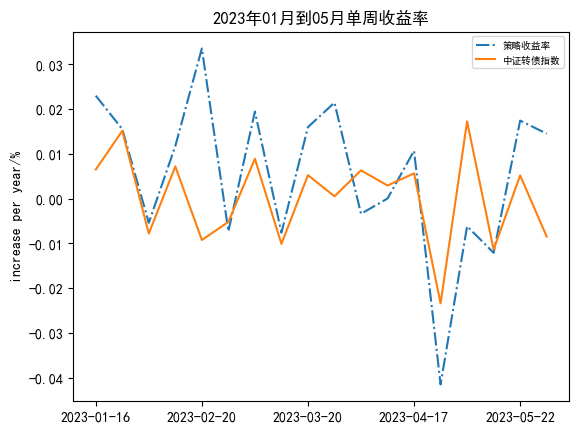

In [23]:
# this year
acp = []
grp_cd = []
fil_cd = []
res2 = []
mk = []



grp_cd = []
fil_cd = [['dp',100,130]]
    
fil_cd = [['dp',100,130],['ytm', -1, 999], ['bl', 0, 10], ['trt',10,20]]
    


rk_cd = [['dl', 5, 'a']]
rk_cd = [['ytm', 5, 'd']]  
mk_one = []
    
time = m23w.copy()
for k in range(1,len(time)):
    mk_one.append((DTBS['C']['zi'][time[k]]-DTBS['C']['zi'][time[k-1]])/(DTBS['C']['zi'][time[k-1]]))
        
cm_profit, one_profit = cumulative_profit(time, grp_cd, fil_cd, rk_cd)
#     win_stat(one_profit, mk_one)
#     plot_profit(time, cm_profit, mk_one, tt = time[0][:4] + '年' + time[0][5:7] +'月' + '到' + time[-1][5:7] + '月' +'累计收益率')
plot_profit(time, one_profit,mk_one, tt = time[0][:4] + '年' + time[0][5:7] +'月' + '到' + time[-1][5:7] + '月' +'单周收益率')
    
res2.append(one_profit)
mk.append(mk_one)
acp.append(cm_profit[-1])
#     print(len(acp), i, acp)
print(str(round(acp[0]*100,4)) + '%')
print('sharpe', sharpe(one_profit))

0
18.9671%
57.14%
1.82
12.09%
23.27%
1
44.0337%
65.22%
4.64
12.61%
20.23%
2
-3.9202%
61.9%
-0.81
8.11%
15.38%
3
short position in 2022-08-15
0.4965%
52.17%
-0.1
8.32%
16.36%
4
short position in 2023-04-03
11.1829%
66.67%
2.41
7.26%
12.05%


<Figure size 8000x6000 with 0 Axes>

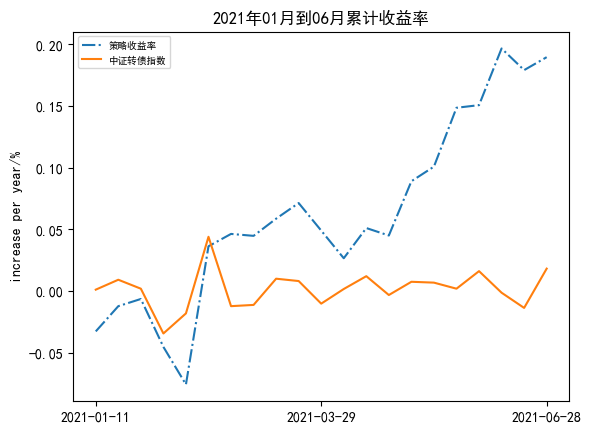

<Figure size 8000x6000 with 0 Axes>

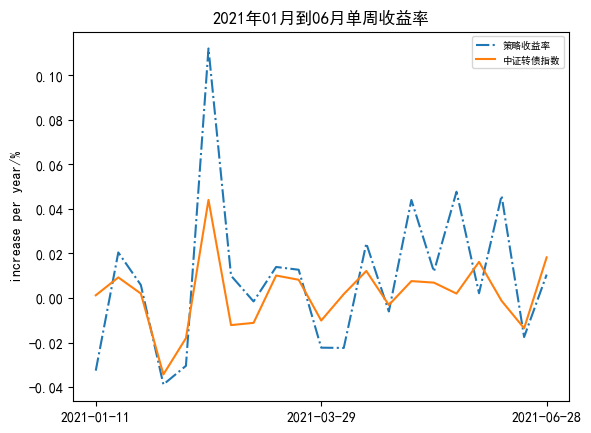

<Figure size 8000x6000 with 0 Axes>

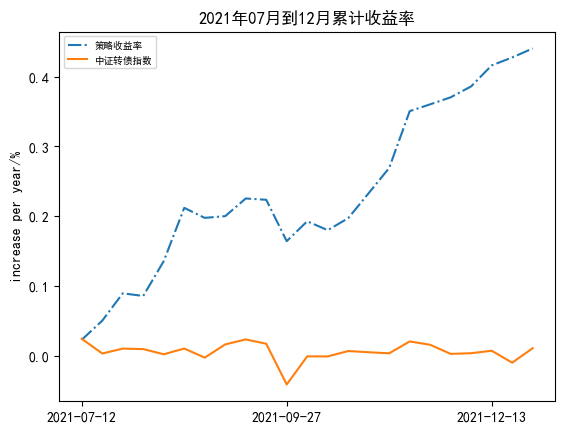

<Figure size 8000x6000 with 0 Axes>

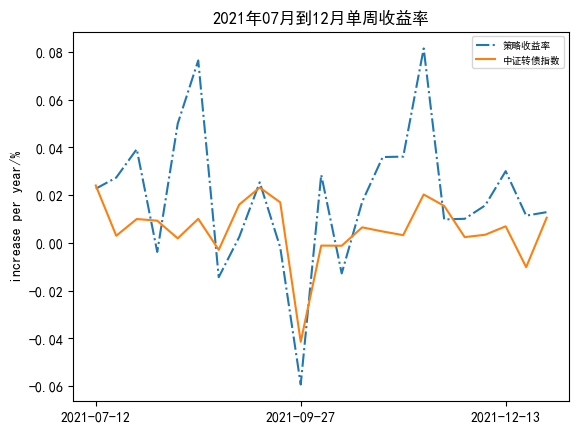

<Figure size 8000x6000 with 0 Axes>

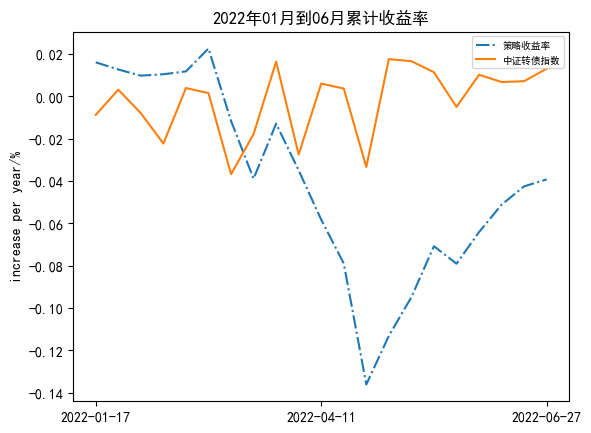

<Figure size 8000x6000 with 0 Axes>

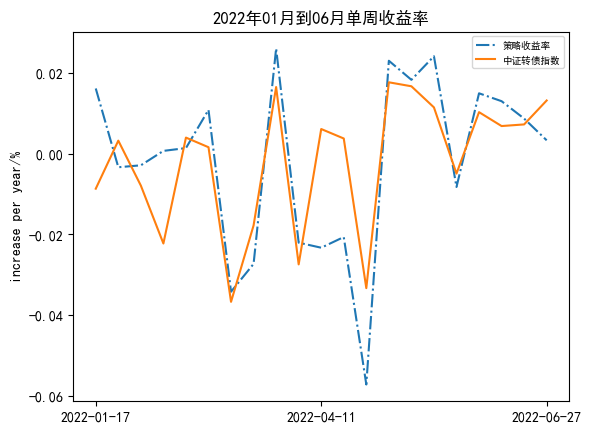

<Figure size 8000x6000 with 0 Axes>

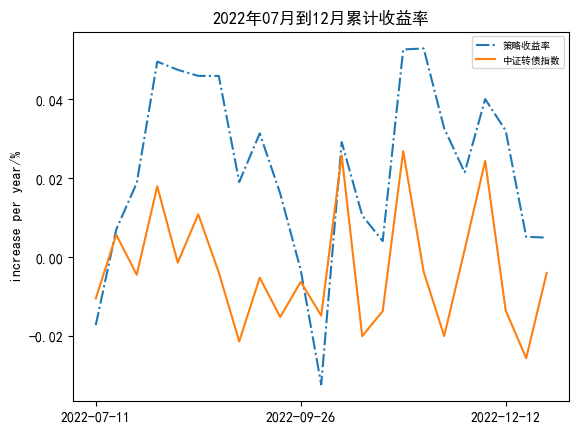

<Figure size 8000x6000 with 0 Axes>

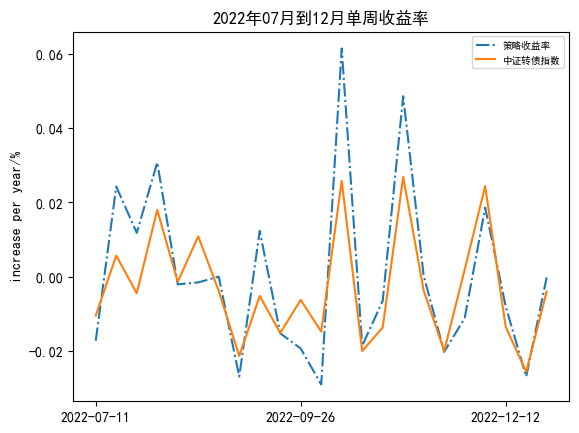

<Figure size 8000x6000 with 0 Axes>

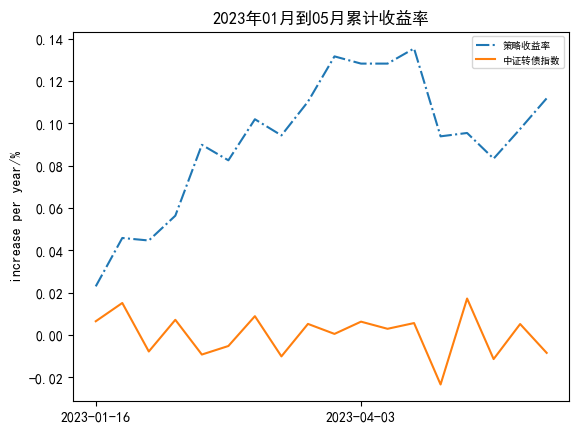

<Figure size 8000x6000 with 0 Axes>

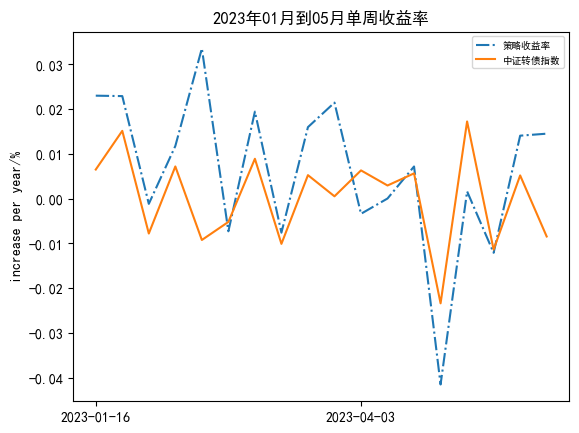

In [22]:
tts = ['2020年上半年收益率',  '2020年下半年收益率', '2021年上半年收益率', '2021年下半年收益率','2022年上半年收益率', '2022年下半年收益率','2023年上半年收益率']

tick_spacing = 10



tf = [f20fm, s20fm, f21fm, s21fm, f22fm, s22fm, f23fm]
tm = [f20mm, s20mm, f21mm, s21mm, f22mm, s22mm, f23mm]
tw = [f20wm, s20wm, f21wm, s21wm, f22wm, s22wm, f23wm]
twy = [a20wm, a21wm, a22wm, f23wm]
tw = [f21wm, s21wm, f22wm, s22wm, f23wm]
acp = []
grp_cd = []
fil_cd = []
res2 = []
mk = []
# print("ytm>-1市值<7换手2-10双低100-130前5 2022年起每半年至今, 限制双低必须在当天市场前25%")
for i in range(len(tw)):
    print(i)

    grp_cd = []
    fil_cd = [['dp',100,130]]
    
    fil_cd = [['dp',100,130],['ytm', -2, 999], ['bl', 0, 7], ['trt',10,20]]
    fil_cd = [['dp',100,130],['ytm', -1, 999], ['trt',10,20]]



    rk_cd = [['ytm', 5, 'd']]  
    rk_cd = [['dl', 5, 'a']]
    mk_one = []
    time = tw[i].copy()
    for k in range(1,len(time)):
        mk_one.append((DTBS['C']['zi'][time[k]]-DTBS['C']['zi'][time[k-1]])/(DTBS['C']['zi'][time[k-1]]))
        
    cm_profit, one_profit = cumulative_profit(time, grp_cd, fil_cd, rk_cd)
    wr = win_stat(one_profit, mk_one)
    plot_profit(time, cm_profit, mk_one, tt = time[0][:4] + '年' + time[0][5:7] +'月' + '到' + time[-1][5:7] + '月' +'累计收益率')
    plot_profit(time, one_profit,mk_one, tt = time[0][:4] + '年' + time[0][5:7] +'月' + '到' + time[-1][5:7] + '月' +'单周收益率')
    
    mk.append(mk_one)
    print(str(round(cm_profit[-1]*100,4)) + '%')
    print(str(round(wr*100,2)) + '%')
    print(round(sharpe(one_profit),2))
    print(str(round(down(one_profit)*100,2)) + '%')
    print(str(round(vola(one_profit)*100,2)) + '%')




    



In [8]:





tts = ['2020年上半年收益率',  '2020年下半年收益率', '2021年上半年收益率', '2021年下半年收益率','2022年上半年收益率', '2022年下半年收益率','2023年上半年收益率']





tf = [f20fm, s20fm, f21fm, s21fm, f22fm, s22fm, f23fm]
tm = [f20mm, s20mm, f21mm, s21mm, f22mm, s22mm, f23mm]
tw = [f20wm, s20wm, f21wm, s21wm, f22wm, s22wm, f23wm]
twy = [a20wm, a21wm, a22wm, f23wm]

acp = []
grp_cd = []
fil_cd = []
res2 = []
mk = []

tw = [f21wm, s21wm, f22wm, s22wm, f23wm]
# print("ytm>-1市值<7换手2-10双低100-130前5 2022年起每半年至今, 限制双低必须在当天市场前25%")
for i in range(len(tw)):


    grp_cd = []
    fil_cd = [['dp',100,130]]
    
    fil_cd = [['dp',100,130],['ytm', 0, 999], ['trt',10,20]]
    


    rk_cd = [['dl', 5, 'a']]
    rk_cd = [['ytm', 5, 'd']]  
    mk_one = []
    
    time = tw[i].copy()
    for k in range(1,len(time)):
        mk_one.append((DTBS['C']['zi'][time[k]]-DTBS['C']['zi'][time[k-1]])/(DTBS['C']['zi'][time[k-1]]))
        
    cm_profit, one_profit = cumulative_profit(time, grp_cd, fil_cd, rk_cd)

    res2.append(one_profit)
    mk.append(mk_one)
    acp.append(cm_profit[-1])

    print(str(round(cm_profit[-1]*100,4)) + '%')


15.1184%
short position in 2021-12-06
27.0169%
short position in 2022-02-28
18.2333%
short position in 2022-08-15
0.3529%
short position in 2023-01-09
short position in 2023-02-20
short position in 2023-04-03
short position in 2023-04-17
short position in 2023-05-08
short position in 2023-05-22
5.3592%


到期收益率q0.00 -4.78
到期收益率q0.10 -4.49
到期收益率q0.20 -4.26
到期收益率q0.25 -4.15
到期收益率q0.30 -4.06
到期收益率q0.40 -3.83
到期收益率q0.50 -3.72
到期收益率q0.60 -3.55
到期收益率q0.70 -3.4
到期收益率q0.75 -3.28
到期收益率q0.80 -3.21
到期收益率q0.90 -3.06
到期收益率q1.00 -2.48


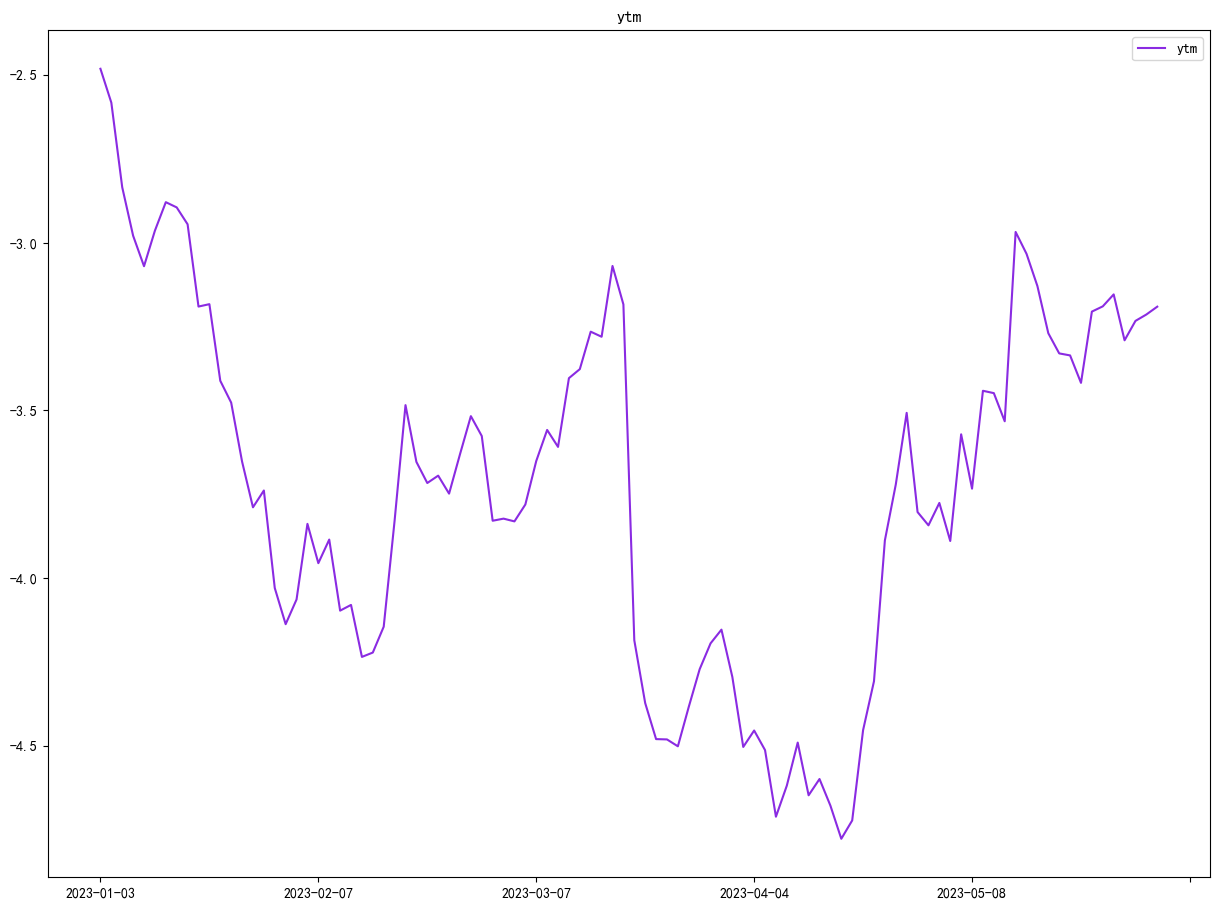

In [39]:
# PZX
plt.rcParams['figure.figsize'] = (15, 11) 
# 20231月到5月
dts = DTBS['D']['day'][1459:1557]

tick_spacing = 10

all_mean1 = []

nm = 'ytm'
for dt in dts:
    c = []

    for code in DTBS['A'].keys():
        if DTBS['A'][code][dt]['ia'] == 1:
            if not np.isnan(DTBS['A'][code][dt][nm]):
                c.append(DTBS['A'][code][dt][nm] )
 
    all_mean1.append(np.mean(c))

    
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(dts, all_mean1, c = 'blueviolet',linestyle='solid', label = nm)
ax1.legend(loc=1)

# ax2.get_yaxis().set_visible(False) 

ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.title(nm)
plt.savefig(nm, dpi=300)

all_mean1_clean = [i for i in all_mean1 if not np.isnan(i)]
print('到期收益率q0.00', round(np.quantile(a=all_mean1_clean, q = 0),2))
print('到期收益率q0.10', round(np.quantile(a=all_mean1_clean, q = 0.1),2))
print('到期收益率q0.20', round(np.quantile(a=all_mean1_clean, q = 0.2),2))
print('到期收益率q0.25', round(np.quantile(a=all_mean1_clean, q = 0.25),2))
print('到期收益率q0.30', round(np.quantile(a=all_mean1_clean, q = 0.3),2))
print('到期收益率q0.40', round(np.quantile(a=all_mean1_clean, q = 0.4),2))
print('到期收益率q0.50', round(np.quantile(a=all_mean1_clean, q = 0.5),2))
print('到期收益率q0.60', round(np.quantile(a=all_mean1_clean, q = 0.6),2))
print('到期收益率q0.70', round(np.quantile(a=all_mean1_clean, q = 0.7),2))
print('到期收益率q0.75', round(np.quantile(a=all_mean1_clean, q = 0.75),2))
print('到期收益率q0.80', round(np.quantile(a=all_mean1_clean, q = 0.8),2))
print('到期收益率q0.90', round(np.quantile(a=all_mean1_clean, q = 0.9),2))
print('到期收益率q1.00', round(np.quantile(a=all_mean1_clean, q = 1),2))

plt.show()

['2023-01-03',
 '2023-01-04',
 '2023-01-05',
 '2023-01-06',
 '2023-01-09',
 '2023-01-10',
 '2023-01-11',
 '2023-01-12',
 '2023-01-13',
 '2023-01-16',
 '2023-01-17',
 '2023-01-18',
 '2023-01-19',
 '2023-01-20',
 '2023-01-30',
 '2023-01-31',
 '2023-02-01',
 '2023-02-02',
 '2023-02-03',
 '2023-02-06',
 '2023-02-07',
 '2023-02-08',
 '2023-02-09',
 '2023-02-10',
 '2023-02-13',
 '2023-02-14',
 '2023-02-15',
 '2023-02-16',
 '2023-02-17',
 '2023-02-20',
 '2023-02-21',
 '2023-02-22',
 '2023-02-23',
 '2023-02-24',
 '2023-02-27',
 '2023-02-28',
 '2023-03-01',
 '2023-03-02',
 '2023-03-03',
 '2023-03-06',
 '2023-03-07',
 '2023-03-08',
 '2023-03-09',
 '2023-03-10',
 '2023-03-13',
 '2023-03-14',
 '2023-03-15',
 '2023-03-16',
 '2023-03-17',
 '2023-03-20',
 '2023-03-21',
 '2023-03-22',
 '2023-03-23',
 '2023-03-24',
 '2023-03-27',
 '2023-03-28',
 '2023-03-29',
 '2023-03-30',
 '2023-03-31',
 '2023-04-03',
 '2023-04-04',
 '2023-04-06',
 '2023-04-07',
 '2023-04-10',
 '2023-04-11',
 '2023-04-12',
 '2023-04-

In [38]:
dt = '2023-05-31'
lp = ['113604.SH',
'118007.SH',
'123054.SZ',
'123104.SZ',
'123105.SZ',
'123116.SZ',
'123138.SZ',
'123157.SZ',
'128015.SZ',
'118021.SH',
'123164.SZ']

for r in lp:
    print(r, DTBS['B'][r]['cn'], DTBS['B'][r]['sc'],  DTBS['B'][r]['sn'],  '强赎：',  DTBS['A'][r][dt]['qs30'], "收盘价：", DTBS['A'][r][dt]['dp'],  "转股溢价率：", DTBS['A'][r][dt]['cpr'], "到期收益率：", DTBS['A'][r][dt]['ytm'],"换手率：", DTBS['A'][r][dt]['trt'], '市值',  DTBS['A'][r][dt]['bl'],  DTBS['F'][DTBS['B'][r]['sc']]['2023-03']['hb']/100000000, '双低', DTBS['A'][r][dt]['dl'], '货币资金','申万一级', DTBS['B'][r]['cat1'],'申万二级', DTBS['B'][r]['cat2'])

113604.SH 多伦转债 603528.SH 多伦科技 强赎： 0 收盘价： 111.882 转股溢价率： 51.31 到期收益率： 1.18 换手率： 2.29 市值 6.396 6.1911454764 双低 163.192 货币资金 申万一级 计算机(2021) 申万二级 软件开发(2021)
118007.SH 山石转债 688030.SH 山石网科 强赎： 0 收盘价： 131.958 转股溢价率： 41.97 到期收益率： -1.96 换手率： 11.57 市值 2.673 3.8465919601999996 双低 173.928 货币资金 申万一级 计算机(2021) 申万二级 软件开发(2021)
123054.SZ 思特转债 300608.SZ 思特奇 强赎： 0 收盘价： 136.3 转股溢价率： 31.51 到期收益率： -4.09 换手率： 34.23 市值 2.073 8.0406001959 双低 167.81 货币资金 申万一级 计算机(2021) 申万二级 软件开发(2021)
123104.SZ 卫宁转债 300253.SZ 卫宁健康 强赎： 0 收盘价： 118.875 转股溢价率： 111.92 到期收益率： 1.2 换手率： 2.66 市值 9.7 10.859421062000001 双低 230.79500000000002 货币资金 申万一级 计算机(2021) 申万二级 软件开发(2021)
123105.SZ 拓尔转债 300229.SZ 拓尔思 强赎： 0 收盘价： nan 转股溢价率： nan 到期收益率： nan 换手率： nan 市值 nan 3.090773449 双低 999 货币资金 申万一级 计算机(2021) 申万二级 软件开发(2021)
123116.SZ 万兴转债 300624.SZ 万兴科技 强赎： 0 收盘价： nan 转股溢价率： nan 到期收益率： nan 换手率： nan 市值 nan 3.4840559799 双低 999 货币资金 申万一级 计算机(2021) 申万二级 软件开发(2021)
123138.SZ 丝路转债 300556.SZ 丝路视觉 强赎： 0 收盘价： 137.1 转股溢价率： 37.0 到期收益率： -2.61 换手率： 76.47 市值 2.397